### Oscar Ko - Data 71200

---

# PROJECT 2: Supervised Learning

---

Data from https://www.kaggle.com/datasets/mathchi/diabetes-data-set

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Value based on a function that scores likelihood of diabetes based on family history
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

---

# Step 1: Load Data & Testing-Training Split from Project 1

### Import Packages & Data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

original_data = pd.read_csv("data/diabetes.csv")

original_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Train-Test Split Stratified

In [7]:
# import package
from sklearn.model_selection import train_test_split


# declare our X inputs and y outcomes
X = original_data.drop("Outcome", axis=1)
y = original_data["Outcome"]


# stratify split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=42)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (614, 8)
X_test.shape =  (154, 8)
y_train.shape =  (614,)
y_test.shape =  (154,)


y_train class proportions: 
 0    0.651466
1    0.348534
Name: Outcome, dtype: float64


y_test class proportions: 
 0    0.649351
1    0.350649
Name: Outcome, dtype: float64


---

**Self Notes:**

I was a bit confused about the two methods of stratifying. 

I found a great explanation here: https://stackoverflow.com/questions/61299828/stratify-argument-in-train-test-split-vs-stratifiedshufflesplit


- *Train-Test Split Stratified* and *Stratified Shuffle Split* can both produce balanced splits.


- Train-Test Split Stratified is for creating distinct subsets from the data.


- Stratified Shuffle Splits is typically used with Cross Validation. 


- Instead of having Cross Validation make its own folds, we have an instance of StratifiedShuffleSplit create folds that are balanced and shuffled.


---

### Data Cleaning

In [10]:
# create function with all cleaning steps
def clean_set(X_data, y_data):
    
    zero_g = X_data["Glucose"] == 0
    zero_bmi = X_data["BMI"] == 0
    zero_bp = X_data["BloodPressure"] == 0
    
    # get index of cases with 0 Glucose, BMI, or Blood Pressure
    indexes_to_remove = (zero_g | zero_bmi | zero_bp)
    
    # remove the zero cases
    X_data = X_data[~indexes_to_remove]
    y_data = y_data[~indexes_to_remove]
    
    # remove SkinThickness column
    X_data = X_data.drop("SkinThickness", axis=1)
    
    return X_data, pd.DataFrame(y_data)


# clean all the train and test sets together
X_train, y_train = clean_set(X_train, y_train)
X_test, y_test = clean_set(X_test, y_test)


print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)

print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

print("\n")
print("y_train class proportions: \n", y_train.value_counts(normalize=True))

print("\n")
print("y_test class proportions: \n", y_test.value_counts(normalize=True))

X_train.shape =  (583, 7)
X_test.shape =  (141, 7)
y_train.shape =  (583, 1)
y_test.shape =  (141, 1)


y_train class proportions: 
 Outcome
0          0.656947
1          0.343053
dtype: float64


y_test class proportions: 
 Outcome
0          0.652482
1          0.347518
dtype: float64


---

# Step 2: Prepare your data

### Check Unscaled Feature Min, Max, and Range

Minimum for each feature
 Pregnancies                  0.000
Glucose                     56.000
BloodPressure               24.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.084
Age                         21.000
dtype: float64
Maximum for each feature
 Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
Insulin                     744.000
BMI                          67.100
DiabetesPedigreeFunction      2.329
Age                          81.000
dtype: float64


Text(0, 0.5, 'Feature magnitude')

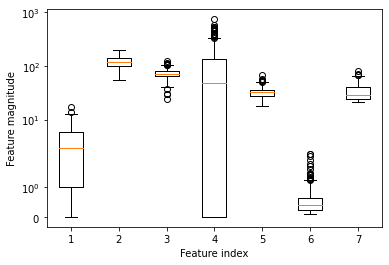

In [17]:
# CHECK THE MINIMUM AND MAXIMUM VALUES ------------

print("Minimum for each feature\n", X_train.min(axis=0))
print("Maximum for each feature\n", X_train.max(axis=0))


# CHECK THE RANGES WITH BOXPLOT -------------------

plt.boxplot(X_train)

# using a logarithmic scale for the y-axis
plt.yscale("symlog")

# label axes
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

### Feature Scaling

Minimum for each feature
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64
Maximum for each feature
 Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
dtype: float64


Text(0, 0.5, 'Feature magnitude')

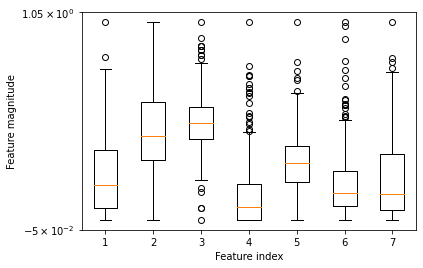

In [18]:
# FEATURE SCALING ON X_train and X_test ----------------------------------

# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
    
# use THE SAME transformation on the test set
X_test_scaled = (X_test - min_on_training) / range_on_training


# CHECK THE MINIMUM AND MAXIMUM VALUES ------------

print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))


# CHECK THE RANGES WITH BOXPLOT -------------------

plt.boxplot(X_train_scaled)

# using a logarithmic scale for the y-axis
plt.yscale("symlog")

# label axes
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

### Deal with Categorical Features

The features in the dataset are all continuous, so no encoding is necessary.

---

# Step 3: Examine your target attribute

### Rename target attribute

The target attribute is a binary feature named "Outcome."

I will rename it to "hasDiabetes" to be a little more intuitive. 

In [22]:
y_train.rename(columns={'Outcome':'hasDiabetes'}, inplace=True)
y_test.rename(columns={'Outcome':'hasDiabetes'}, inplace=True)

print(y_train.columns)
print(y_test.columns)

Index(['hasDiabetes'], dtype='object')
Index(['hasDiabetes'], dtype='object')


### Convert from integer to string

So the visualization's axis won't bother with values between 0 and 1.

In [23]:
y_train["hasDiabetes"] = y_train["hasDiabetes"].astype(str)
y_test["hasDiabetes"] = y_test["hasDiabetes"].astype(str)

print(y_train["hasDiabetes"].dtype)
print(y_test["hasDiabetes"].dtype)

object
object


### Plot Target Attribute

(As the target attribute is binary, I used a bar chart instead of a histogram.)

Text(0.5, 1.0, 'Has Diabetes')

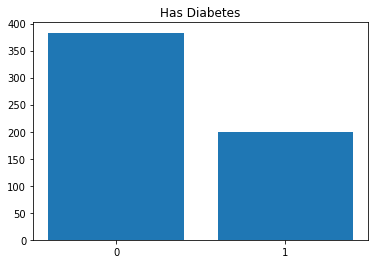

In [24]:
plt.bar(y_train["hasDiabetes"].unique(), y_train["hasDiabetes"].value_counts())

plt.title("Has Diabetes")

---

# Algorithm 1: K Nearest Neighbors

### Stratified Shuffle-Split Cross-Validation (Default KNN)

In [26]:
# Create instance of StratifiedShuffleSplit ----------------------------------------

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)


# Create instance of KNN Classifier -------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()


# Use Cross-Validation with KNN and Stratified-Shuffle Splits (on train set) ----------

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(KNN, X_train_scaled, y_train, cv=sss)

print("Each cv_score: {}\n".format(cv_scores))
print("Mean of cv_scores: {}".format(np.mean(cv_scores)))

Each cv_score: [0.72649573 0.74358974 0.74358974 0.73504274 0.71794872]

Mean of cv_scores: 0.7333333333333334


### Evaluation Metrics (Default KNN)

(Creating a function for confusion matrix and evaluation metrics for convenience)

In [27]:
# Train default KNN model and make predictions on training set -------

KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_test_scaled)


# Confusion Matrix --------------------------------------------------

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n{}".format(confusion))


# Precision, Recall, and f1-score ------------------------------------

from sklearn.metrics import classification_report

print(classification_report(y_test, 
                            y_pred,
                            target_names=["No diabetes", "Has diabetes"]))

Confusion matrix:
[[78 14]
 [27 22]]
              precision    recall  f1-score   support

 No diabetes       0.74      0.85      0.79        92
Has diabetes       0.61      0.45      0.52        49

    accuracy                           0.71       141
   macro avg       0.68      0.65      0.65       141
weighted avg       0.70      0.71      0.70       141



### GridSearchCV (KNN)

In [28]:
# CONDUCT GRID SEARCH ---------------------------

from sklearn.model_selection import GridSearchCV

# dictionary of parameters to search
param_grid = {"n_neighbors": np.arange(1, 25),
             "metric": ["euclidean", "manhattan", "minkowski", "cosine"],
             "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
             "weights": ["uniform", "distance"]}

# grid search on all values of k in dictionary
KNN_gscv = GridSearchCV(KNN, param_grid, cv=5)

KNN_gscv.fit(X_train_scaled, y_train)


# PRINT RESULTS ---------------------------

# best performing k (on training set)
print("best params:\n\n", KNN_gscv.best_params_)

# accuracy of best performing k

print("\nbest score:\n\n", KNN_gscv.best_score_, "\n\n")

best params:

 {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

best score:

 0.7872531682876511 




### Stratified Shuffle-Split Cross-Validation (KNN Best Params)

In [29]:
# Create instance of StratifiedShuffleSplit ----------------------------------------

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)


# CREATE KNN with BEST PARAMS -----------------------------------------

from sklearn.neighbors import KNeighborsClassifier

KNN2 = KNeighborsClassifier(algorithm='auto',
                            metric='manhattan',
                            n_neighbors=19,
                            weights='distance')


# CROSS-VALIDATION and Stratified-Shuffle Splits (on training set) ----------------------------------

from sklearn.model_selection import cross_val_score

cv_scores2 = cross_val_score(KNN2, X_train_scaled, y_train, cv=sss)



# COMPARE KNN Models --------------------------------------------------

print("Mean of cross validation scores (train set) - Default KNN: {}\n".format(np.mean(cv_scores)))
print("Mean of cross validation scores (train set)  - KNN with Best Params: {}\n\n".format(np.mean(cv_scores2)))

Mean of cross validation scores (train set) - Default KNN: 0.7333333333333334

Mean of cross validation scores (train set)  - KNN with Best Params: 0.7401709401709402




### Confusion Matrix & Evaluation Metrics (KNN Best Params)

In [32]:
# Train model and make predictions on testing set ------------

KNN2.fit(X_train_scaled, y_train)

y_pred2 = KNN2.predict(X_test_scaled)


# CONFUSION MATRIX --------------------------------------------------

from sklearn.metrics import confusion_matrix

confusion2 = confusion_matrix(y_test, y_pred2)

print("Default KNN - Confusion matrix:\n\n{}\n".format(confusion))
print("KNN with Best Params - Confusion matrix:\n\n{}\n\n".format(confusion2))


# EVALUATION METRICS ------------------------------------

from sklearn.metrics import classification_report

print("Default KNN - Evaluation Metrics\n")
print(classification_report(y_test, 
                            y_pred,
                            target_names=["No diabetes - 0", "Has diabetes - 1"]))

print("\nKNN with Best Params - Evaluation Metrics\n")
print(classification_report(y_test, 
                            y_pred2,
                            target_names=["No diabetes - 0", "Has diabetes - 1"]))

Default KNN - Confusion matrix:

[[78 14]
 [27 22]]

KNN with Best Params - Confusion matrix:

[[81 11]
 [23 26]]


Default KNN - Evaluation Metrics

                  precision    recall  f1-score   support

 No diabetes - 0       0.74      0.85      0.79        92
Has diabetes - 1       0.61      0.45      0.52        49

        accuracy                           0.71       141
       macro avg       0.68      0.65      0.65       141
    weighted avg       0.70      0.71      0.70       141


KNN with Best Params - Evaluation Metrics

                  precision    recall  f1-score   support

 No diabetes - 0       0.78      0.88      0.83        92
Has diabetes - 1       0.70      0.53      0.60        49

        accuracy                           0.76       141
       macro avg       0.74      0.71      0.72       141
    weighted avg       0.75      0.76      0.75       141



**Notes:**
    
    
In all areas, KNN improved with the optimized parameters!

There's higher correct predictions and lower incorrect predictions.

The optimized model even predicted the training set better than the default model.

Maybe since KNN is a simple algorithm, it benefits greatly from optimization. (That idea is in contrast to what happens with the Support Vector Machine models below.)
    

---

# Algorithm 2: Support Vector Machine

### Stratified Shuffle-Split Cross-Validation (Default SVM)

In [48]:
# Create instance of StratifiedShuffleSplit ----------------------------------------

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)


# Create instance of SVM Classifier -------------------

from sklearn.svm import SVC

SVM = SVC()


# Use Cross-Validation with SVM and Stratified-Shuffle Splits (on train set) ----------

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(SVM, X_train_scaled, y_train, cv=sss)

print("Each cv_score: {}\n".format(cv_scores))
print("Mean of cv_scores: {}".format(np.mean(cv_scores)))

Each cv_score: [0.77777778 0.78632479 0.78632479 0.77777778 0.77777778]

Mean of cv_scores: 0.7811965811965812


### Evaluation Metrics (Default SVM)

In [49]:
# Train default model and make predictions on training set -------

SVM.fit(X_train_scaled, y_train)

y_pred = SVM.predict(X_test_scaled)


# Confusion Matrix --------------------------------------------------

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n{}".format(confusion))


# Precision, Recall, and f1-score ------------------------------------

from sklearn.metrics import classification_report

print(classification_report(y_test, 
                            y_pred,
                            target_names=["No diabetes", "Has diabetes"]))

Confusion matrix:
[[76 16]
 [23 26]]
              precision    recall  f1-score   support

 No diabetes       0.77      0.83      0.80        92
Has diabetes       0.62      0.53      0.57        49

    accuracy                           0.72       141
   macro avg       0.69      0.68      0.68       141
weighted avg       0.72      0.72      0.72       141



### GridSearchCV (SVM)

In [51]:
# CONDUCT GRID SEARCH ---------------------------

from sklearn.model_selection import GridSearchCV

# dictionary of parameters to search
param_grid = {"C": [1, 10, 100, 1000],
             "gamma": ["scale", 0.1, 1],
             "kernel": ["rbf", "linear", "sigmoid", "poly"]}


# grid search on all values of k in dictionary
SVM_gscv = GridSearchCV(SVM, param_grid, cv=5)

SVM_gscv.fit(X_train_scaled, y_train)


# PRINT RESULTS ---------------------------

# best performing params (on training set)
print("best params:\n\n", SVM_gscv.best_params_)

# accuracy of best performing params
print("\nbest score:\n\n", SVM_gscv.best_score_)

best params:

 {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

best score:

 0.7890509873268494


---

**Notes:**
    
The optimal kernel type is linear.

Maybe this is a hint that a simple linear model could have performed better!

---


### Stratified Shuffle-Split Cross-Validation (SVM Best Params)

In [52]:
# Create instance of StratifiedShuffleSplit ----------------------------------------

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5,
                               test_size=0.2, 
                               random_state=42)

# CREATE MODEL with BEST PARAMS -----------------------------------------

# SVM2 = SVC(C=100, 
#            gamma=0.01)
SVM2 = SVC(C=100, 
           gamma='scale',
           kernel='linear')


# CROSS-VALIDATION and Stratified-Shuffle Splits (on training set) ----------------------------------

from sklearn.model_selection import cross_val_score

cv_scores2 = cross_val_score(SVM2, X_train_scaled, y_train, cv=sss)



# COMPARE KNN Models --------------------------------------------------

print("Mean of cross validation scores (train set) - Default SVM: {}\n".format(np.mean(cv_scores)))
print("Mean of cross validation scores (train set)  - SVM with Best Params: {}\n\n".format(np.mean(cv_scores2)))

Mean of cross validation scores (train set) - Default SVM: 0.7811965811965812

Mean of cross validation scores (train set)  - SVM with Best Params: 0.7948717948717949




### Confusion Matrix & Evaluation Metrics (SVM Best Params)

In [56]:
# Train model and make predictions on testing set ------------

SVM2.fit(X_train_scaled, y_train)

y_pred2 = SVM2.predict(X_test_scaled)


# CONFUSION MATRIX --------------------------------------------------

from sklearn.metrics import confusion_matrix

confusion2 = confusion_matrix(y_test, y_pred2)

print("Default SVM - Confusion matrix:\n\n{}\n".format(confusion))
print("SVM with Best Params - Confusion matrix:\n\n{}\n\n".format(confusion2))


# EVALUATION METRICS ------------------------------------

from sklearn.metrics import classification_report

print("Default SVM - Evaluation Metrics\n")
print(classification_report(y_test, 
                            y_pred,
                            target_names=["No diabetes - 0", "Has diabetes - 1"]))

print("\nSVM with Best Params - Evaluation Metrics\n")
print(classification_report(y_test, 
                            y_pred2,
                            target_names=["No diabetes - 0", "Has diabetes - 1"]))

Default SVM - Confusion matrix:

[[76 16]
 [23 26]]

SVM with Best Params - Confusion matrix:

[[76 16]
 [26 23]]


Default SVM - Evaluation Metrics

                  precision    recall  f1-score   support

 No diabetes - 0       0.77      0.83      0.80        92
Has diabetes - 1       0.62      0.53      0.57        49

        accuracy                           0.72       141
       macro avg       0.69      0.68      0.68       141
    weighted avg       0.72      0.72      0.72       141


SVM with Best Params - Evaluation Metrics

                  precision    recall  f1-score   support

 No diabetes - 0       0.75      0.83      0.78        92
Has diabetes - 1       0.59      0.47      0.52        49

        accuracy                           0.70       141
       macro avg       0.67      0.65      0.65       141
    weighted avg       0.69      0.70      0.69       141



**Notes:**
    
    
It seems the SVM model with optimized parameters actually performed slightly worse. The number of False Negatives increased by 3. More False Negatives is undesirable when predicting diabetes. Untreated diabetes can destroy someone's health.


This slight decrease in performance may be due to randomness or slight overfitting:
    
- The SVM model with default parameters already performing fairly well.
    - Maybe the optimized model performing slightly worse is just due to randomness.



- Maybe optimizing the parameters *slightly* overfitted the model. 
    - The optimized SVM performed slightly better on the training set with a CV score that was 0.005 higher (or 0.5% better) than the default model.
    - It performed slightly worse than the default model on the testing set.
    
  

**Conclusions:**

    
- Of all the models done above, the optimized K Nearest Neighbors performed the best.

 
- The Support Vector Machine's accuracy and ability to generalize did not improve with optimization.


- Since a "linear" kernel was optimal for the SVM model, that may be a hint that a simple linear model could classify the outcomes better.